# 🧑‍💻 Entraînement d'un modèle de Machine Learning

## Introduction

L'objectif de ce notebook est d'entraîner un modèle de Machine Learning pour prédire le prix de vente d'un bien immobilier à partir de ses caractéristiques. \
 Le machine learning est un ensemble de technique permettant de faire "apprendre" à un algorithme une nouvelle compétence, ici le fait de pouvoir prédire le prix d'un bien immobilier.

Les données utilisées pour notre TP sont issues du jeu de données publique des [valeurs foncières françaises de 2021](https://www.data.gouv.fr/en/datasets/demandes-de-valeurs-foncieres/). Ces données ont été retravaillées pour vous et se trouvent dans le fichier `data.csv`.

Nous allons suivre les étapes suivantes:
- Charger les données
- Analyser les données
- Préparer les données
- Entraîner un modèle
- Évaluer le modèle


## 📊 Etape 1 : Manipulation et exploration des données

Afin de manipuler notre dataset nous allons utiliser la librairie `pandas`. Cette librairie permet de manipuler des données tabulaires (comme dans un fichier Excel par exemple).

Cette librairie est très utilisée dans le monde du Machine Learning car elle permet de manipuler facilement des données et de les préparer. \
Savoir manipuler des données avec `pandas` fait partie des compétences clés d'un Data Scientist !

Lien vers la documentation de `pandas`: https://pandas.pydata.org/docs/

In [1]:
# TODO: Importer la librairie pandas

# import ...

In [ ]:
# TODO: Lire le fichier data.csv
# Hint: utiliser la methode .read_csv() de pandas

# df = ... 
# df

En exécutant les cellules ci-dessus vous avez pu charger le dataset dans un DataFrame `df`. Un DataFrame est un objet de la librairie `pandas` qui permet de manipuler des données tabulaires.

L'objectif des cellules suivantes est d'analyser notre dataset afin de mieux le comprendre et de préparer nos données pour l'entraînement de notre modèle.

In [71]:
# TODO: Afficher les 5 premières lignes du dataframe 
# Hint: utiliser la méthode .head()

In [72]:
# TODO: Afficher une analyse statistique du dataframe
# Hint: utiliser la méthode .describe()

In [74]:
# TODO: Calculer la moyenne du prix des maisons ayant pour postcode 75.
# Il est possible facilement filtrer les données sur une colonne et de sélectionner une colonne en particulier
# Hint: https://www.educative.io/answers/how-to-filter-pandas-dataframe-by-column-value

In [ ]:
# TODO (difficile): Trier les postcodes par ordre croissant de prix moyen des maisons

## 🧹 2. Préparation des données pour l'entraînement

Avant de pouvoir entraîner notre modèle nous devons préparer nos données. Cette étape est très importante et peut prendre beaucoup de temps (en général +50% du temps de travail). \
En effet, les données que nous avons récupérées ne sont pas exploitables directement par notre modèle. Il est donc nécessaire de les transformer afin de pouvoir les utiliser.

Il est important de distinguer différents types de variables:

- Les variables `catégorielles` qui représentent des catégories (ex: type de bien immobilier, code postal, ...). Parmi les variables catégorielles on distingue 2 sous-catégories:

  - Les variables `nominales` qui ne peuvent pas être ordonnées (ex: type de bien immobilier, code postal)
  - Les variables `ordinales` qui peuvent être ordonnées (ex: mention au bac: Très bien, Bien, Assez Bien, ...)

- Les variables `numériques` qui représentent des valeurs numériques (ex: surface, nombre de pièces, ...). Parmi les variables numériques on distingue 2 sous-catégories:
  - Les variables `continues` qui peuvent prendre n'importe quelle valeur (ex: m2 de surface, ...)
  - Les variables `discrètes` qui ne peuvent prendre qu'un nombre fini de valeurs réelles possibles (ex: nombre de pièces, ...)

Pour plus d'informations sur les variables vous pouvez consulter [cette page](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch8/5214817-fra.htm).

In [76]:
# TODO: Par soucis de simplicité nous n'allons pour le moment pas nous intéresser à la colonne `postcode`. 
# Supprimer la colonne `postcode` du dataframe
# Hint: utiliser la méthode .drop()
# Note: créer une nouvelle variable pour stocker le nouveau dataframe

# data = ...

### Encodage des variables catégorielles

Il est important de comprendre que les modèles de Machine Learning ne peuvent pas prendre en entrée n'importe quel type de données, il faut que les données soient homogènes. Dans notre cas, notre modèle ne peut pas prendre en entrée des chaînes de caractères (ex: `Maison`, `Appartement`, ...). Il est donc nécessaire de transformer ces chaînes de caractères sous format numérique, ie en nombres. On appelle cette étape **`encodage`**.

Il existe plusieurs manières d'encoder des données dont les deux plus connus (pour plus d'informations vous pouvez consulter [cette page](https://inria.github.io/scikit-learn-mooc/python_scripts/03_categorical_pipeline.html)): 
- `label encoding` : produit une nouvelle colonne en associant à chaque valeur possible un entier 
- `one-hot encoding` : produit autant de colonnes que de valeurs possibles avec pour value 0 ou 1 

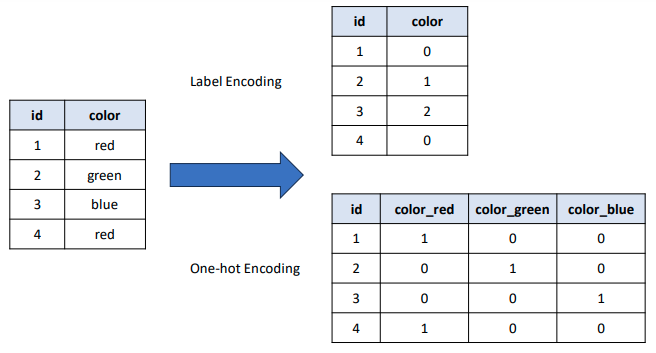

Dans notre cas, étant donné que notre variable `house_type` ne peut prendre que 2 valeurs (`Maison` ou `Appartement`) nous allons utiliser un `label encoding`. Cet encodage consiste à remplacer chaque valeur unique de notre variable par un entier. Dans notre cas, nous allons remplacer `Maison` par `0` et `Appartement` par `1`.

Ainsi, nous sommes capable de donner à notre modèle l'information `Maison` ou `Appartement` à travers des entiers et non plus des chaînes de caractères.



In [ ]:
# TODO: Créer un objet de type `LabelEncoder` de la librairie sklearn et l'assigner à la variable `label_encoder`
# Cet objet doit être `fit` sur la colonne `house_type`
# Hint: se référer à le doc https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

# from sklearn.preprocessing ...
# label_encoder = ...

In [22]:
# Vérifier que l'exécution de cette cellule produit: [1, 0, 0]
label_encoder.transform(['Maison', 'Appartement', 'Appartement'])

array([1, 0, 0])

In [29]:
# TODO: Remplacer la colonne `house_type` dans le dataframe `data` par la version encodée de cette colonne. 
# Hint: utiliser la méthode .transform() de l'objet `label_encoder`

# data['house_type'] = ...

In [ ]:
# Vérifier que notre DataFrame ne contient que des colonnes numériques
data

_Note_ : Dans la majorité des cas on préfèrera utiliser un `OneHotEncoder` qui permet de transformer une variable catégorielle en plusieurs variables binaires (0 ou 1). Cela permet d'éviter de donner un ordre aux valeurs de la variable catégorielle. Dans notre cas, nous avons choisi d'utiliser un `LabelEncoder` car notre variable ne peut prendre que 2 valeurs donc le résultat est équivalent. Si vous souhaitez en savoir sur le OneHotEncoder vous pouvez consulter [cette page](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html).

### Séparation des données d'entraînement et de test

En Machine Learning il est très important de séparer nos données en 2 parties:

- Les données d'entraînement qui vont nous permettre d'entraîner notre modèle
- Les données de test qui vont nous permettre d'évaluer les performances de notre modèle

Les données de test doivent impérativement être écartées de l'entrainement de  notre modèle pour ne pas biaiser les résultats. En effet, si nous utilisions les données de test pour entraîner notre modèle, nous pourrions avoir l'impression que notre modèle est très performant alors qu'en réalité il ne généralise pas bien et ne sera pas performant sur de nouvelles données.

C'est comme si vous aviez en évaluation le même exercice que vous aviez fait en TD! L'objectif n'étant de savoir copier coller un résulalt mais "d'apprendre" une méthode.

Cette séparation permet donc d'évaluer la capacité de notre modèle à généraliser sur de nouvelles données. En général, on utilise 80% des données pour l'entraînement et 20% pour le test (cela peut varier en fonction de la taille de notre dataset).

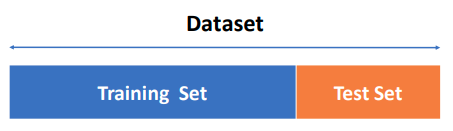
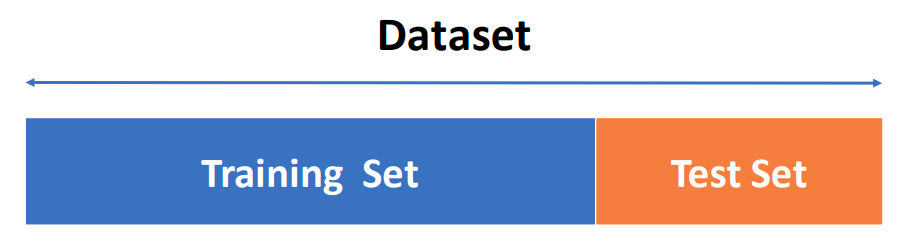
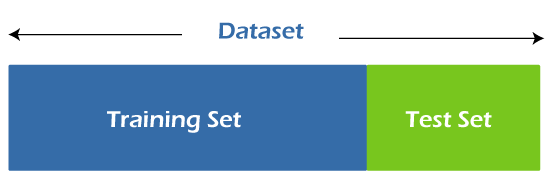

In [31]:
# TODO: Créer deux variables X et y qui contiennent respectivement les features et les labels. Pour cela, utiliser la méthode `drop` de pandas pour supprimer
# la colonne `value` du dataframe `data` et l'assigner à la variable X.
# La variable y doit contenir uniquement la colonne `value` du dataframe `data`

# X, y = ...

In [83]:
# TODO: importer la fonction `train_test_split` de la librairie sklearn et séparer
# les données en un jeu d'entraînement et un jeu de test. Le jeu de test doit contenir
# 20% des données.
# from sklearn.model_selection ...
# X_train, X_test, y_train, y_test = ...

In [85]:
# TODO: Vérifier que la dataframe d'entraînement contient 879792 lignes

_Note_: la fonction `train_test_split` de `scikit-learn` effectue un tirage aléatoire des données. Il est donc possible que vous obteniez des résultats différents de ceux présentés dans ce notebook. Sauf si vous avez fixé la graine aléatoire `random_state` (voir [cette page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

## 3. Entraînement du modèle

On appelle `modèle` de Machine Learning une fonction mathématique qui prend en entrée des données et qui renvoie une prédiction. Dans notre cas, notre modèle prendra en entrée les caractéristiques d'un bien immobilier (surface, nombre de pièces, ...) et renverra une estimation du prix de ce bien.

On distingue 2 grandes familles de modèles de Machine Learning:

- Les modèles de `régression` qui permettent de prédire une valeur continue (ex: prix d'un bien immobilier)
- Les modèles de `classification` qui permettent de prédire une valeur discrète (ex: prédire si un mail est un spam ou non)

Dans notre cas nous allons utiliser un modèle de régression linéaire. Ce modèle est très simple et permet de prédire une valeur continue à partir d'une combinaison linéaire de nos variables d'entrée. Dans notre cas, notre modèle prendra la forme suivante:

$$
prix = \beta_0 + \beta_1* surface + \beta_2 * nbRoom + \beta_3 * gardenArea + \beta_4 * houseType + \beta_5 * postcode
$$

Où les $\beta_i,$ sont des paramètres du modèle que nous allons apprendre à partir de nos données d'entraînement.

Pour plus d'informations sur les modèles de régression linéaire vous pouvez consulter [cette page](https://www.voxco.com/fr/blog/comment-calculer-la-regression-lineaire/) qui explique comment calculer les paramètres de notre modèle.

_Note_: dans notre cas nous utiliserons une régression linéaire multiple car nous avons plusieurs variables d'entrée. Si nous n'avions qu'une seule variable d'entrée nous parlerions de régression linéaire simple.

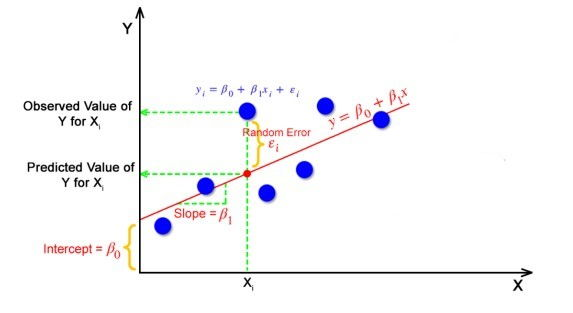

In [86]:
# TODO: importer la classe `LinearRegression` de la librairie sklearn et entraîner
# un modèle de régression linéaire sur les données d'entraînement. Ce modèle sera
# assigné à la variable `model`
from sklearn.linear_model import LinearRegression
# model = ...

In [46]:
# Vérifier que l'exécution de cette cellule produit: 8908694 (dans le ca où 
# la variable `random_state` de la fonction `train_test_split` est égale à 42)
model.predict(X_train.iloc[0:1])

array([5294279.74148212])

Et voilà ! Vous avez entraîné votre premier modèle de Machine Learning (ou pas) ! Vous pouvez maintenant l'utiliser pour prédire le prix de vente d'un bien immobilier à partir de ses caractéristiques.

## Évaluation du modèle

En Machine Learning il est très important d'évaluer les performances de notre modèle. En effet, il est possible que notre modèle ne soit pas performant et ne soit pas capable de prédire correctement le prix de vente d'un bien immobilier. Afin de connaître les performances de notre modèle nous allons utiliser une métrique appelée `MAE` (Mean Absolute Error). Cette métrique permet de mesurer l'erreur moyenne de notre modèle. Plus cette métrique est faible, plus notre modèle est performant.

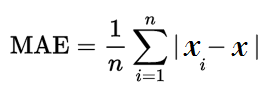

Il existe de nombreuses autres métriques que nous pourrions utiliser (ex: `RMSE` qui est très utilisée). Pour plus d'informations vous pouvez consulter [cette page](https://scikit-learn.org/stable/modules/model_evaluation.html). Certaines méthodes d'évaluation sont plus adaptées à certains types de problèmes. Par exemple, pour un problème de classification on utilisera plutôt la métrique `accuracy` qui permet de mesurer le taux de bonnes prédictions.

In [87]:
# TODO importer la fonction `mean_absolute_error` de la librairie sklearn et
# calculer l'erreur absolue moyenne sur le jeu de test

# from sklearn.metrics import ...

L'erreur obtenue est exprimée en euros. Cela peut sembler beaucoup mais il faut garder en tête que nous avons utilisé un modèle très simple. Il est possible d'obtenir de bien meilleurs résultats en utilisant des modèles plus complexes ou en transformant la données d'entrée.

In [88]:
# TODO: importer un modèle de régression basé sur les arbres de décision
# (DecisionTreeRegressor) et entraîner ce modèle sur les données d'entraînement
# assigner le modèle à la variable `model2`. Utilisez le même procédé que pour
# la régression linéaire
# Lien d'aide: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [89]:
# TODO: calculer l'erreur absolue moyenne sur le jeu de test pour le modèle 2
# et comparer avec le modèle 1

On remarquer plusieurs choses:
- Le modèle est plus performant que le modèle de régression linéaire. Ce n'est pas parfait mais c'est un bon début !
- Il est possible d'améliorer les performances de notre modèle en utilisant un modèle plus complexe (ex: `RandomForestRegressor` ou `GradientBoostingRegressor` de `scikit-learn`).
- Il est possible de modifier les hyperparamètres de notre modèle afin d'obtenir de meilleurs résultats. Voir sur la documentation
- Il est très difficile d'estimer le prix de vente d'un bien immobilier à partir des quelques caractéristiques que nous avons. Afin que notre modèle soit plus performant il faudrait utiliser plus de données (ex: code postal, nombre de salles de bain, année de construction, ...). Une phrase à retenir `Garbage in, garbage out` (si on donne de mauvaises données à notre modèle, il ne pourra pas faire de miracle).

## Création d'une pipeline

Précédemment, nous avons comparé 2 modèles et nous avons décidé de garder le
plus performant. Afin de créer le modèle le plus pertinent possible pour notre
application de prédiction de prix immobilier, nous allons réentraîner le modèle
sélectionné sur l'ensemble des données (jeu d'entraînement + jeu de test).

Nous allons également créer une pipeline qui permettra de transformer nos données avant de les donner en entrée de notre modèle. Cela nous sera très utile pour transformer de nouvelles données avant de les donner en entrée de notre modèle.

En réalité, grâce à la pipeline nous allons réaliser toutes les étapes précédentes en quelques lignes de code. :)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
# Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

# Cette pipeline permet d'encoder les données catégorielles et d'entraîner
# un modèle de régression
encoder = ColumnTransformer(transformers=[
    ('one_hot_encoder', OneHotEncoder(), ['house_type'])
])

pipeline = Pipeline(steps=[
    ('preprocessing', encoder),
    ('model', DecisionTreeRegressor())
])

In [ ]:
# Cette pipeline peut être entraînée et utilisée comme un modèle. Cela a l'avantage
# de pouvoir facilement changer le modèle utilisé ou les étapes de prétraitement
# des données, ainsi que de pouvoir facilement utiliser toutes les étapes de transformation
# de données et la prédiction.
pipeline.fit(X, y)

## Sauvegarde du modèle

Afin de pouvoir utiliser notre modèle dans une applicationnous allons le sauvegarder dans un fichier. Pour cela nous allons utiliser la librairie `pickle` qui permet de sauvegarder des objets Python dans un fichier.

Cette étape est très importante car elle nous permet de ne pas avoir à réentrainer notre modèle à chaque fois que nous voulons l'utiliser. En effet, l'entraînement d'un modèle peut prendre beaucoup de temps (en fonction de la taille de notre dataset et de la complexité de notre modèle).

In [8]:
# Serialisation de la pipeline entraînée
# Cette cellule va créer un fichier `pipeline.pkl` qui contient la pipeline 
# entraînée. Ce fichier pourra être ensuite chargé et réutilisé
import pickle

with open('pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

In [9]:
# TODO vérifier que vous arrivez à charger la pipeline dans la variable `loaded_model`
# et que vous pouvez effectuer des prédictions avec cette pipeline.
# Vous pouvez effectuer une prédiction sur les données initiales (avant l'encodage),
# la pipeline s'occupera de faire les transformations nécessaires
loaded_model = pickle.load(open("pipeline.pkl", 'rb'))
# loaded_model.predict ...
